# To be or not to be
# Shakespeare Dataset Classification
Since there aren't many features in the raw file, and PlayerLine and Play are in English language, so encode PlayerLine and Play needs to be encoded.

__Main steps:__
    1. Data cleaning: All rows contain null are removed, since they are just voiceover
    2. Data Transformation: a) ActSceneLine is seperated to 3 columns: Act, Scene and Line
                            b) Label Encoder is used to transform target labels with value between 0 and 
                               n_classes -1
                            c) One hot is used to transform categorical features as a one-hot numeric array
    3. Feature correlation
    4. Decision tree, Random Forest and Logistic Regression classifiers are applied

In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
# Load libraies
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings("ignore")

# Load Data Frames

In [2]:
data_Shakespeare = pd.read_csv("../data/raw/Shakespeare_data.csv",encoding ='latin' ,low_memory =False)
#load Raw Data
data_Shakespeare.shape

(111396, 6)

# Process Data Frames

In [3]:
# From the dataframe, i found that whenever Playerlinenumber or ActSceneLine are NaN, are just voiceover.
# So i would delete all the lines with NaN.
data_Shakespeare.dropna(inplace = True) 
data_Shakespeare.head(5)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [4]:
actsceneline = data_Shakespeare.ActSceneLine.str.split(pat = '.',n = -1, expand = True)
data_Shakespeare['Act'] = actsceneline[0]
data_Shakespeare['Scene'] = actsceneline[1]
data_Shakespeare['Line'] = actsceneline[2]
data_Shakespeare.describe()

,Dataline,PlayerLinenumber
count,105152.000000,105152.000000
mean,55718.007018,36.765872
std,32155.201153,39.989659
min,4.000000,1.000000
25%,27941.750000,10.000000
50%,55647.500000,25.000000
75%,83515.250000,50.000000
max,111395.000000,405.000000


In [5]:
# The needed info are Play, PLayer and PlayerLine,Act, Scene,Line
# Reconstruct the dataframe
data_Shakespeare = data_Shakespeare.drop(columns = ['ActSceneLine','Dataline'])
data_Shakespeare = data_Shakespeare [['Player','PlayerLine','Play','Act','Scene','Line']]
Shakespeare_Player = data_Shakespeare.groupby('Player').size()
# To get the number of players.
Shakespeare_Player.shape[0]

934

In [6]:
Shakespeare_Player.head(5)

Player
A Lord           1
A Patrician      3
A Player         4
AARON          356
ABERGAVENNY     18
dtype: int64

Encoding Label

In [7]:
from sklearn.preprocessing import LabelEncoder
object = LabelEncoder()
df = pd.get_dummies(data_Shakespeare , columns = ['Play'])
df['PlayerLine'] = object.fit_transform(data_Shakespeare['PlayerLine'].astype('str'))
#df['Act'] = object.fit_transform(data_Shakespeare['Act'].astype('str'))
#df['Scene'] = object.fit_transform(data_Shakespeare['Scene'].astype('str'))
#df['Line'] = object.fit_transform(data_Shakespeare['Line'].astype('str'))
df['Player'] = object.fit_transform(data_Shakespeare['Player'].astype('str'))
df['Play'] = object.fit_transform(data_Shakespeare['Play'].astype('str'))

In [8]:
df.head(10)

,Player,PlayerLine,Act,Scene,Line,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,...,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth,Play
3,457,60240,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,457,23568,1,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,457,4998,1,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6,457,73793,1,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
7,457,48893,1,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
8,457,58066,1,1,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
9,457,49761,1,1,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
10,457,49645,1,1,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
11,457,52908,1,1,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12,457,83752,1,1,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [9]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,Player,PlayerLine,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,Play_As you like it,Play_Coriolanus,Play_Cymbeline,...,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth,Play
Player,1.000000,-0.008478,-0.083419,0.052297,-0.014757,-0.026526,-0.018135,0.051463,-0.004765,-0.039273,...,0.023179,0.043473,0.001550,0.063238,0.078224,0.058573,0.060803,0.098758,0.034921,0.101288
PlayerLine,-0.008478,1.000000,-0.040721,-0.005642,0.022569,0.041586,-0.017707,0.050286,0.013755,0.001122,...,-0.022687,-0.019152,-0.005179,0.005484,-0.037730,0.004324,0.042346,-0.006476,-0.009737,-0.018562
Play_A Comedy of Errors,-0.083419,-0.040721,1.000000,-0.020004,-0.025100,-0.023355,-0.025865,-0.022316,-0.026617,-0.026573,...,-0.024048,-0.022144,-0.020596,-0.021547,-0.021806,-0.025585,-0.021472,-0.020342,-0.021056,-0.231618
Play_A Midsummer nights dream,0.052297,-0.005642,-0.020004,1.000000,-0.026340,-0.024508,-0.027142,-0.023418,-0.027932,-0.027886,...,-0.025235,-0.023238,-0.021613,-0.022611,-0.022883,-0.026849,-0.022532,-0.021346,-0.022096,-0.228771
Play_A Winters Tale,-0.014757,0.022569,-0.025100,-0.026340,1.000000,-0.030751,-0.034056,-0.029383,-0.035047,-0.034989,...,-0.031664,-0.029157,-0.027119,-0.028370,-0.028712,-0.033688,-0.028271,-0.026784,-0.027724,-0.269119
Play_Alls well that ends well,-0.026526,0.041586,-0.023355,-0.024508,-0.030751,1.000000,-0.031688,-0.027340,-0.032610,-0.032556,...,-0.029462,-0.027129,-0.025233,-0.026398,-0.026715,-0.031346,-0.026306,-0.024922,-0.025797,-0.233727
Play_Antony and Cleopatra,-0.018135,-0.017707,-0.025865,-0.027142,-0.034056,-0.031688,1.000000,-0.030278,-0.036114,-0.036055,...,-0.032628,-0.030045,-0.027945,-0.029235,-0.029586,-0.034714,-0.029133,-0.027600,-0.028569,-0.240373
Play_As you like it,0.051463,0.050286,-0.022316,-0.023418,-0.029383,-0.027340,-0.030278,1.000000,-0.031159,-0.031108,...,-0.028151,-0.025922,-0.024111,-0.025223,-0.025527,-0.029951,-0.025135,-0.023813,-0.024649,-0.191454
Play_Coriolanus,-0.004765,0.013755,-0.026617,-0.027932,-0.035047,-0.032610,-0.036114,-0.031159,1.000000,-0.037104,...,-0.033578,-0.030919,-0.028758,-0.030085,-0.030447,-0.035725,-0.029981,-0.028403,-0.029400,-0.209351
Play_Cymbeline,-0.039273,0.001122,-0.026573,-0.027886,-0.034989,-0.032556,-0.036055,-0.031108,-0.037104,1.000000,...,-0.033522,-0.030868,-0.028711,-0.030036,-0.030397,-0.035666,-0.029931,-0.028356,-0.029352,-0.190027


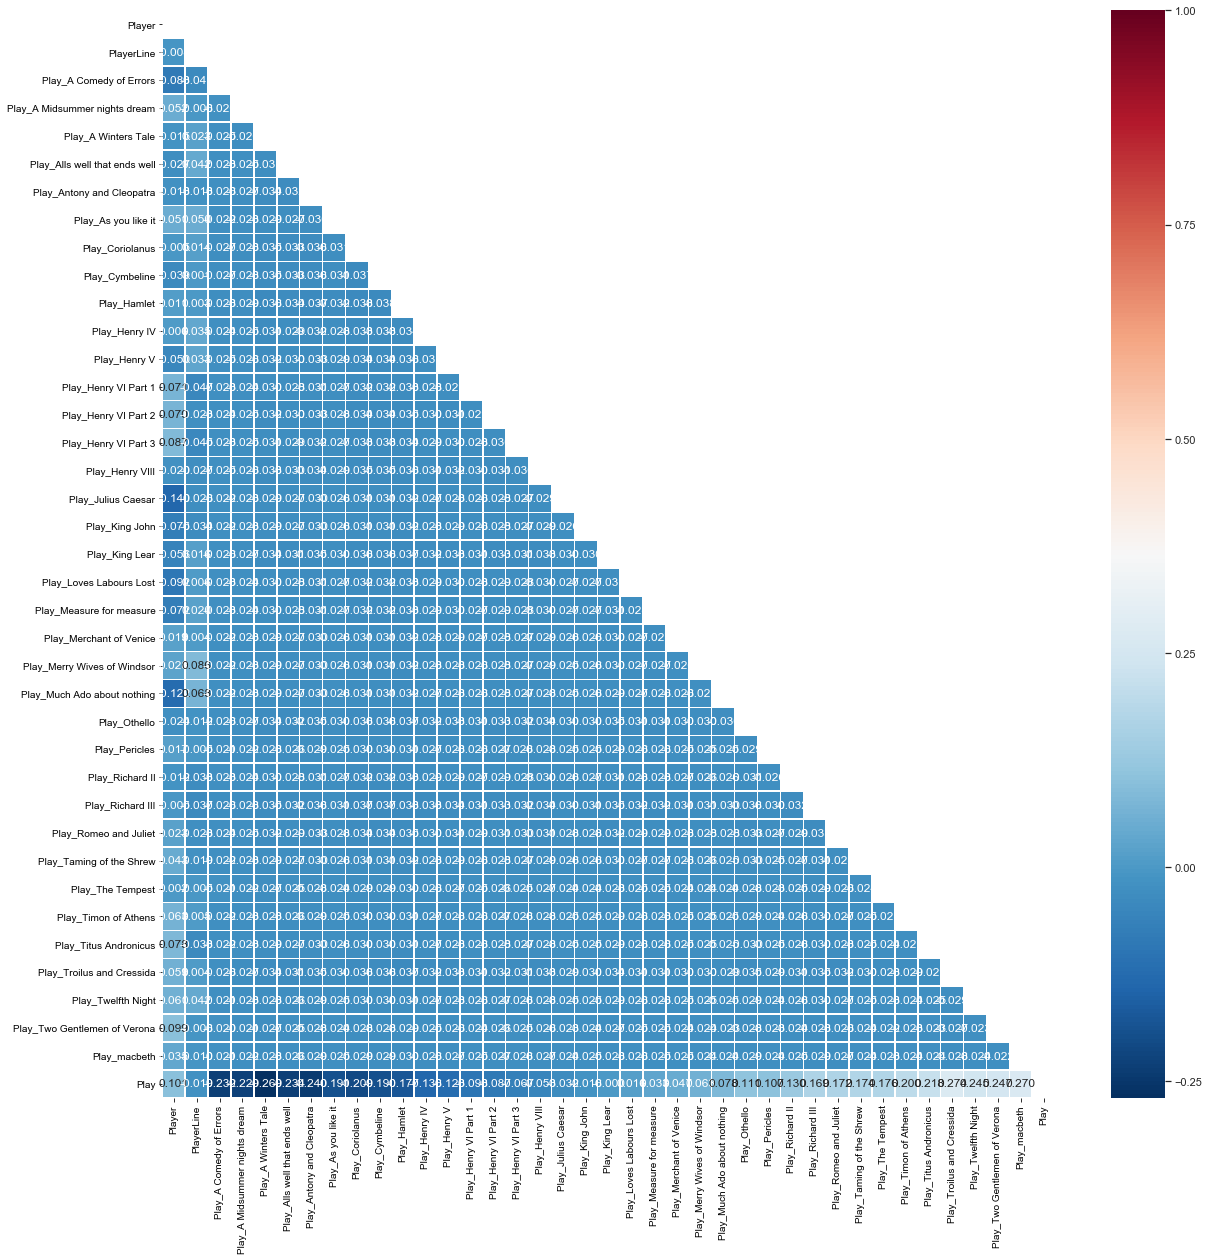

In [10]:
f,ax = plt.subplots(figsize=(20, 20))
mask = np.zeros_like(pearsoncorr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set(style='white')
sns.heatmap(pearsoncorr, mask = mask, cmap="RdBu_r", annot = True, linewidth = .5, fmt = ".3f",ax = ax)
plt.savefig('correlation.png')

In [11]:
print(df['Play'].value_counts())

8     4020
6     3768
7     3756
26    3705
4     3565
23    3563
17    3500
32    3491
2     3364
14    3279
10    3233
12    3130
27    3096
9     3044
13    2939
3     2925
18    2878
19    2840
25    2800
11    2777
5     2677
20    2665
16    2649
28    2637
21    2614
15    2597
22    2584
31    2559
30    2500
33    2483
24    2472
35    2390
29    2289
34    2234
1     2162
0     1967
Name: Play, dtype: int64


In [12]:
#count of distinct feature in the category "Play"
print(df['Player'].value_counts().count())

934


# Split train and test

In [14]:
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import mean_squared_error
data_X= df.drop(columns=['Player'])
data_Y = df["Player"]

In [15]:
data_X.head(5)

,PlayerLine,Act,Scene,Line,Play_A Comedy of Errors,Play_A Midsummer nights dream,Play_A Winters Tale,Play_Alls well that ends well,Play_Antony and Cleopatra,Play_As you like it,...,Play_Romeo and Juliet,Play_Taming of the Shrew,Play_The Tempest,Play_Timon of Athens,Play_Titus Andronicus,Play_Troilus and Cressida,Play_Twelfth Night,Play_Two Gentlemen of Verona,Play_macbeth,Play
3,60240,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,23568,1,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,4998,1,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6,73793,1,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
7,48893,1,1,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [16]:
data_X = minmax_scale(data_X)

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data_X, data_Y, test_size=0.8, random_state=27)

# Apply Random Forest, Decision Tree and Logistic Classifiers

In [32]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
#print(feature)
#print(clf.feature_importances_)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

train score: 1.0
test score: 0.5583913839423694


In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

train score: 1.0
test score: 0.5487506240935783


In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, Y_train)
predict = clf.predict(X_test)
print('train score: ' + str(clf.score(X_train, Y_train)))
print('test score: ' + str(clf.score(X_test, Y_test)))

train score: 0.2670470756062768
test score: 0.25266874301609565


# Result:
    1. Random Forest Classifier accuracy: 55.84%
    2. Decision Tree Classifier accuracy: 54.88%
    3. Logistic Regression Classifier accuracy: 25.27%
From the result, Random Forest Classifier with current parameter setting, overperfomrs Decisoin tree classifier and Logistic Regression Classifier. 